In [1]:
import visualizer
import main_ver02 as main
import visuals
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from selenium import webdriver
import seaborn as sns
import json

In [3]:
# !cat main_ver02.py

In [4]:
league_urls = main.getLeagueUrls()

In [5]:
league_urls

{'Premier League': 'https://1xbet.whoscored.com/Regions/252/Tournaments/2/England-Premier-League',
 'Serie A': 'https://1xbet.whoscored.com/Regions/108/Tournaments/5/Italy-Serie-A',
 'LaLiga': 'https://1xbet.whoscored.com/Regions/206/Tournaments/4/Spain-LaLiga',
 'Bundesliga': 'https://1xbet.whoscored.com/Regions/81/Tournaments/3/Germany-Bundesliga',
 'Ligue 1': 'https://1xbet.whoscored.com/Regions/74/Tournaments/22/France-Ligue-1',
 'Liga NOS': 'https://1xbet.whoscored.com/Regions/177/Tournaments/21/Portugal-Liga-NOS',
 'Eredivisie': 'https://1xbet.whoscored.com/Regions/155/Tournaments/13/Netherlands-Eredivisie',
 'Russian Premier League': 'https://1xbet.whoscored.com/Regions/182/Tournaments/77/Russia-Premier-League',
 'Brasileirão': 'https://1xbet.whoscored.com/Regions/31/Tournaments/95/Brazil-Brasileir%C3%A3o',
 'Major League Soccer': 'https://1xbet.whoscored.com/Regions/233/Tournaments/85/USA-Major-League-Soccer',
 'Super Lig': 'https://1xbet.whoscored.com/Regions/225/Tournaments/1

In [6]:
match_links = main.getMatchUrls(
    comp_url=league_urls["LaLiga"],
    season="2016/2017"                  
)

In [16]:
liga = {}
urls = []

for data in match_links:
    date = data["date"]
    time = data["time"]
    home = data["home"]
    away = data["away"]
    score = data["score"]
    url = data["url"]
    
    
    if url in urls:
        continue
    else:
        urls.append(url)    
    if not home in liga.keys():
        liga[home] = []
    if not away in liga.keys():
        liga[away] = []

    
    liga[home].append({"date":date,"time":time,"home":home,"away":away,"score":score,"url":url})
    liga[away].append({"date":date,"time":time,"home":home,"away":away,"score":score,"url":url})

    

In [17]:
with open("/work/scrayper/whoscored/matchLinks/laliga1617.json","w") as jsonFile:
    jsonFile.write(json.dumps(liga))

In [22]:
with open("/work/scrayper/whoscored/matchLinks/laliga1617.json","r") as jsonFile:
    matchLinks = json.load(jsonFile)

In [8]:
team_urls = main.getTeamUrls(team='Barcelona', match_urls=match_links)
print(team_urls[0])

{'date': 'Aug 20 2016', 'time': '17:15', 'home': 'Barcelona', 'away': 'Real Betis', 'score': '6 : 2', 'url': '/Matches/1102792/Live/Spain-LaLiga-2016-2017-Barcelona-Real-Betis'}


In [9]:
matches_data = main.getMatchesData(match_urls=team_urls[:])

Getting Match Data:   0%|          | 0/38 [01:07<?, ?it/s]


TimeoutException: Message: NettyHttpHandler request execution error


In [112]:
events_ls = [main.createEventsDF(match) for match in matches_data]
# Add EPV column
events_list = [main.addEpvToDataFrame(match) for match in events_ls]
events_dfs = pd.concat(events_list)
events_dfs.head()
events_dfs.to_csv('events.csv')

ValueError: No objects to concatenate

In [3]:
url = "https://www.whoscored.com/Matches/1559839/Live/Spain-LaLiga-2021-2022-Barcelona-Getafe"
match_data = main.getMatchData(url, close_window=True)

Region: Spain, League: LaLiga, Season: 2021/2022, Match Id: 1559839


In [3]:
# Match dataframe containing info about the match
matches_df = main.createMatchesDF(match_data)

# Events dataframe      
events_df = main.createEventsDF(match_data)

# match Id
matchId = match_data['matchId']

# Information about respective teams as dictionary
home_data = matches_df['home'][matchId]
away_data = matches_df['away'][matchId]

In [4]:
events_df = main.addEpvToDataFrame(events_df)

team_players_dict = {}
player_ratings = {}
for venue in ['home','away']:
    team_players_dict[venue] = {}
    for player in matches_df[venue][matchId]['players']:
        team_players_dict[venue][player['playerId']] = (player['name'],player['position'])
        try:
            player_ratings[player['name']] = player['stats']['ratings']
        except KeyError:
            pass
            
comp = input(str('Please input this game Period'))
teamName = 'Barcelona'
teamId = 65
opponent = 'Real-Sociedad'
venue = 'home'


path = f'/work/assets/whoscored/{teamName}/match/2122/'
if not os.path.exists(path):
    os.makedirs(path)
events_df.to_csv(path + f'2122#{comp}.csv')

Please input this game Period 2


In [32]:
df = pd.read_csv("/work/assets/whoscored/barcelona/match/2122/2122#1.csv")
df["period"]
# events_df["period"]

0        FirstHalf
1        FirstHalf
2        FirstHalf
3        FirstHalf
4        FirstHalf
           ...    
1527    SecondHalf
1528      PostGame
1529      PostGame
1530      PreMatch
1531      PreMatch
Name: period, Length: 1532, dtype: object

In [26]:

# events_ls = [main.createEventsDF(match) for match in matches_data]
# # Add EPV column
# events_list = [main.addEpvToDataFrame(match) for match in events_ls]
# events_dfs = pd.concat(events_list)
# events_dfs.to_csv('events.csv')

# Team data
team = 'Barcelona'
teamId = 65
opponent = 'Real-Sociedad'
venue = 'home'

# Get Player Names for home team
team_players_dict = {}
for player in matches_df[venue][match_data['matchId']]['players']:
    team_players_dict[player['playerId']] = player['name'] 
    
# Total Passes
passes_df = events_df.loc[events_df['type']=='Pass'].reset_index(drop=True)
passes_df = passes_df.loc[passes_df['outcomeType']=='Successful'].reset_index(drop=True)
passes_df = passes_df.loc[passes_df['teamId'] == teamId].reset_index(drop=True)
passes_df.head()

,id,eventId,minute,second,teamId,h_a,x,y,expandedMinute,period,...,throwIn,subOn,subOff,defensiveThird,midThird,finalThird,pos,EPV,EPV,EPV
0,2.319452e+09,3,0,0.0,65,h,50.3,50.1,0,FirstHalf,...,False,False,False,False,True,False,True,-0.0003,-0.0003,-0.0003
1,2.319452e+09,4,0,1.0,65,h,45.6,45.5,0,FirstHalf,...,False,False,False,False,True,False,True,-0.0016,-0.0016,-0.0016
2,2.319452e+09,5,0,4.0,65,h,42.0,29.8,0,FirstHalf,...,False,False,False,True,False,False,True,-0.0020,-0.0020,-0.0020
3,2.319452e+09,6,0,6.0,65,h,31.3,72.0,0,FirstHalf,...,False,False,False,False,True,False,True,-0.0006,-0.0006,-0.0006
4,2.319452e+09,7,0,8.0,65,h,33.2,88.9,0,FirstHalf,...,False,False,False,True,False,False,True,-0.0015,-0.0015,-0.0015


In [ ]:
# Cut in 2
first_half_passes = passes_df.loc[passes_df['period']=='FirstHalf']
second_half_passes = passes_df.loc[passes_df['period']=='SecondHalf'].reset_index(drop=True)

# Cut in 4 (quarter = 25 mins)
first_quarter_passes = first_half_passes.loc[first_half_passes['minute'] <= 25]
second_quarter_passes = first_half_passes.loc[first_half_passes['minute'] > 25].reset_index(drop=True)
third_quarter_passes = second_half_passes.loc[second_half_passes['minute'] <= 70]
fourth_quarter_passes = second_half_passes.loc[second_half_passes['minute'] > 70].reset_index(drop=True)

first_quarter_passes.head()

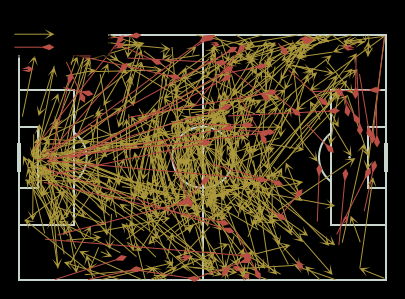

In [12]:
visuals.getTeamTotalPasses(events_df, teamId, team, opponent, pitch_color='#000000')

AttributeError: 'LineCollection' object has no property 'opp_comet'

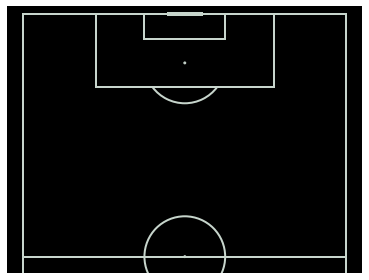

In [14]:
visuals.getTeamSuccessfulBoxPasses(events_df, teamId, team, pitch_color='#000000', cmap='YlGn')

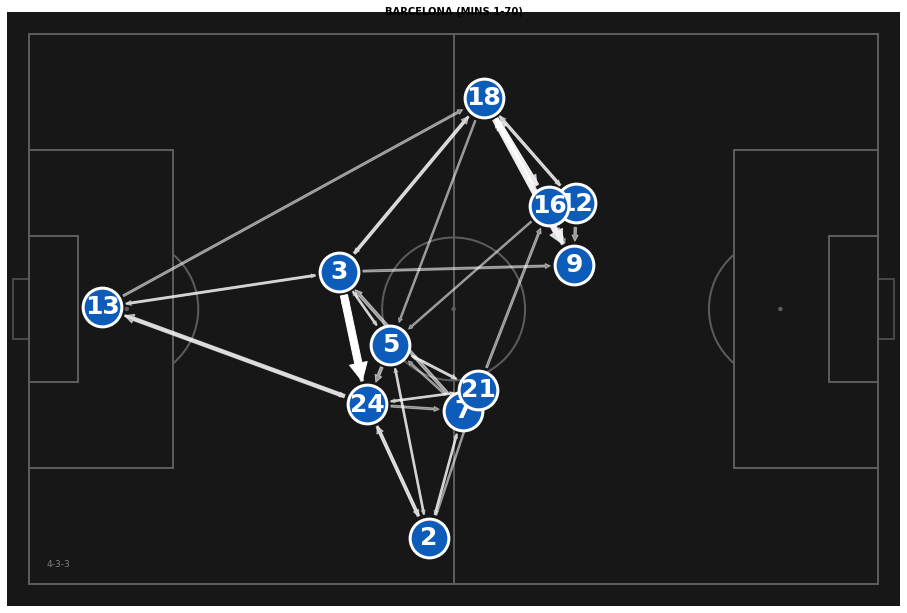

In [17]:
fig,ax = plt.subplots(figsize=(16,11))
visuals.createPassNetworks(match_data, events_df, matchId=match_data['matchId'], team='Barcelona', max_line_width=6, 
                           marker_size=1500, edgewidth=3, dh_arrow_width=25, marker_color='#0e5cba',
                           marker_edge_color='w', shrink=24, ax=ax, kit_no_size=25)


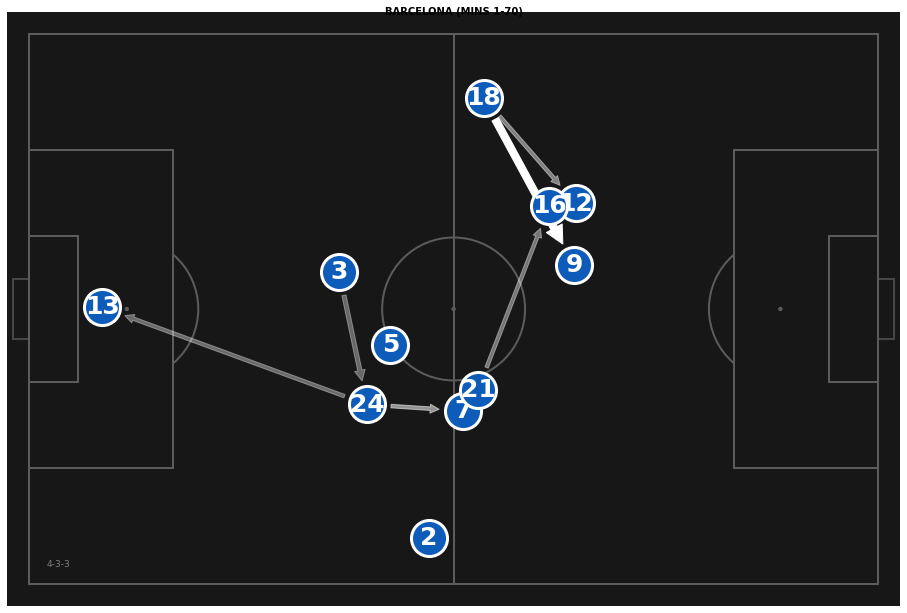

In [18]:
fig,ax = plt.subplots(figsize=(16,11))
visuals.createAttPassNetworks(match_data, events_df, matchId=match_data['matchId'], team='Barcelona', max_line_width=6, 
                              marker_size=1300, edgewidth=3, dh_arrow_width=25, marker_color='#0e5cba', 
                              marker_edge_color='w', shrink=24, ax=ax, kit_no_size=25)


In [ ]:
fig,ax = plt.subplots(figsize=(16,11))

visuals.createPVFormationMap(match_data, events_df, team='Barcelona', color_palette="nipy_spectral_r",
                             markerstyle='8', markersize=2000, markeredgewidth=2, labelsize=7, labelcolor='w', ax=ax)


# プレーヤー1人ひとりの「選択」の能力を測定しようという野心に基づくものだった。
# エクスペクテッド・ポゼッション・バリュー（EPV）と名づけられたこのモデル